In [ ]:
# Importing Necesarry Packages

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential
import warnings
warnings.filterwarnings("ignore") 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HousingData.csv to HousingData (1).csv


In [ ]:
# Load the dataset
data = pd.read_csv('HousingData.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
#(If unnamed column prsent then)data.drop(data.columns[[0]],axis=1,inplace=True)
# Data Exploration
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
data.shape

(506, 14)

In [ ]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [ ]:
data.nunique()

CRIM       484
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        348
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      438
MEDV       229
dtype: int64

In [ ]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
14,0.63796,0.0,8.14,NaN,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5,279,19.2,396.90,NaN,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24,666,20.2,374.68,NaN,29.8
479,14.33370,0.0,18.10,NaN,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
482,5.73116,0.0,18.10,NaN,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01,25.0
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4


In [ ]:
data.size

7084

In [ ]:
data.dropna(inplace = True)

In [ ]:
#Finding out the correlation between the features
corr=data.corr()
corr.shape

(14, 14)

<Axes: >

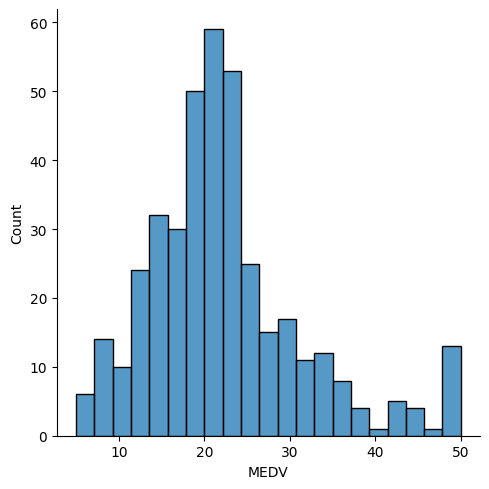

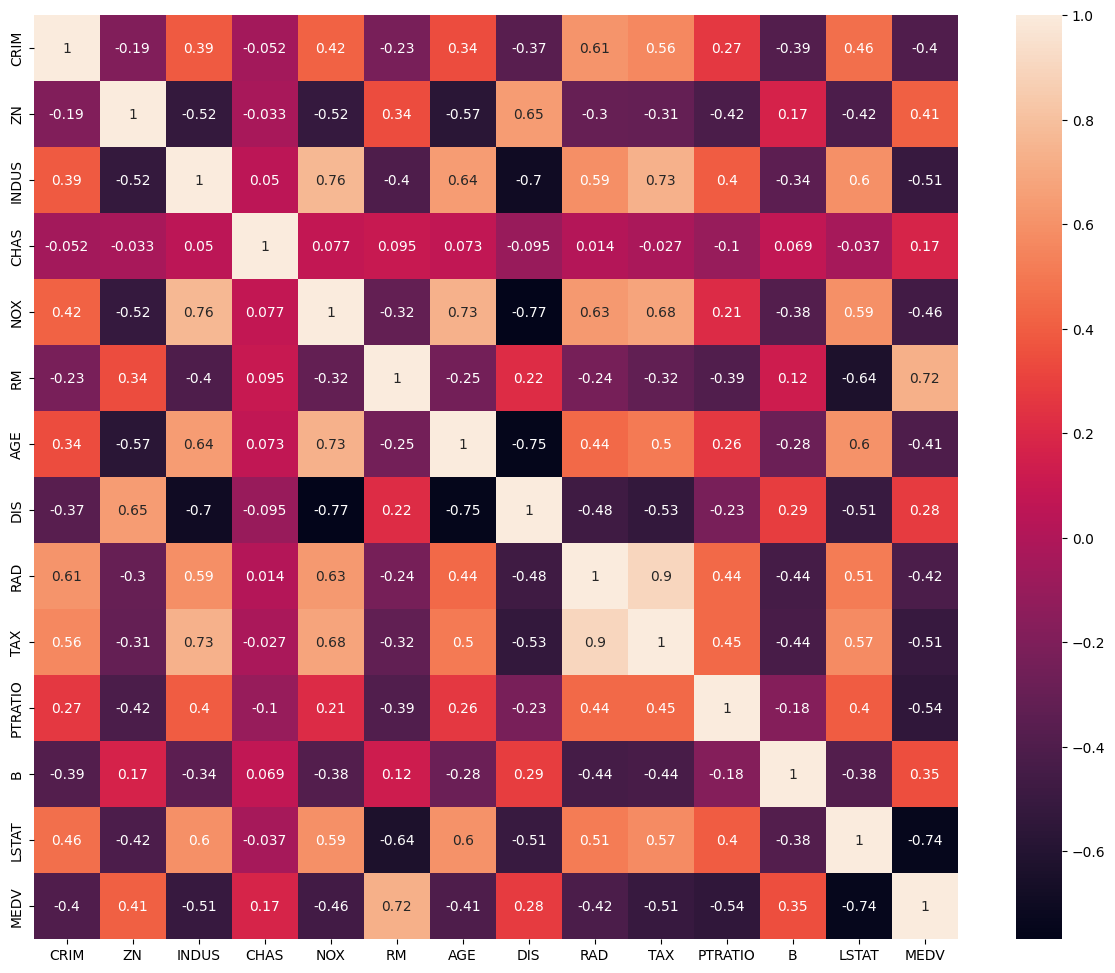

In [ ]:
# Data Visualization
sns.displot(data.MEDV)

correlation = data.corr()
correlation.loc['MEDV']

fig,axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation,square = True,annot = True)



In [ ]:
#Splitting target variable and independent variables
#X = data.drop(['MEDV'], axis = 1)
X=data.iloc[:,:-1]
y = data.MEDV

In [ ]:
x.head()

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,6.430,5.21


In [ ]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: MEDV, dtype: float64

In [ ]:
# Splitting to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

# Normalizing the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Model Building
model = Sequential()
model.add(Dense(128,activation  = 'relu',input_dim =13))
model.add(Dense(64,activation  = 'relu'))
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(16,activation  = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 128)               1792      
                                                                 
 dense_76 (Dense)            (None, 64)                8256      
                                                                 
 dense_77 (Dense)            (None, 32)                2080      
                                                                 
 dense_78 (Dense)            (None, 16)                528       
                                                                 
 dense_79 (Dense)            (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting the data to the model
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
10/10 [==============================] - 2s 4ms/step - loss: 545.1783
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 504.0699
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 429.0407
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 301.1637
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 132.2292
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 70.0475
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 41.6146
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 26.8186
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 20.3142
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 17.7577
Epoch 11/100
10/10 [==============================] - 0s 4ms/step - loss: 16.2165
Epoch 12/100
10/10 [==============================] - 0s 3ms/step - loss: 14.6555
Epoch 13/100
10/10 [

In [ ]:
#Linear REgression
#Training the model

#Importing library for linear regression
from sklearn.linear_model import LinearRegression

#Create a linear regressor
lm=LinearRegression()

#Train the model using the training sets
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
predicted_house_price = lm.predict(X_test)
print("Predicted House Prices")
print(predicted_house_price)

Predicted House Prices
[35.61946325 27.44820607 13.81031281 21.49632213 13.32541866 22.36364968
 20.81489333 22.86148261 15.79734814 33.76662817 39.23780315 27.04052894
 18.86451867 11.1911112   6.61542217 31.81636256 22.8439256  34.95777441
 21.52184654 21.967727   15.93042336 15.15636505 22.38014677 32.42747668
 23.02233688 18.13899114 25.00363961 32.02718125 44.65351875 19.97409103
 29.6722865  14.34080356 31.4807115  10.10772391 13.41854878 15.16760214
 19.12737766 17.34037719 17.08120596 34.01368164 28.47065753 20.79808981
 21.30092759 27.42265368  8.38055129 20.73959653 34.92667195 30.66772561
 35.5958121  16.12768141 30.40353931  9.20951266 27.15813173 16.56913081
 37.66794823  7.22659705 19.46647151  3.57857392 23.70450803 42.83206429
 34.49712508 20.6219898   8.76106106 22.81808441 24.92727332 19.13421115
 27.94165655 35.3420504  35.26942928 20.60469905 33.87992887 16.62545519
 21.28693633 13.74818521 25.57477349 22.13875643 19.85968731 17.88762902
 21.13916106]


In [ ]:
#Value of y intercept
lm.intercept_

22.03904761904762

In [ ]:
#Model prediction on train data
y_pred=lm.predict(X_train)

print('R^2:', metrics.r2_score(y_train,y_pred))
print('Adjusted R^2:',1-(1-metrics.r2_score(y_train,y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:', metrics.mean_absolute_error(y_train,y_pred))
print('MSE:', metrics.mean_squared_error(y_train,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train,y_pred)))


R^2: 0.7849816180951905
Adjusted R^2: 0.7756951099066107
MAE: 2.815031314125257
MSE: 15.693932112949673
RMSE: 3.961556778963249


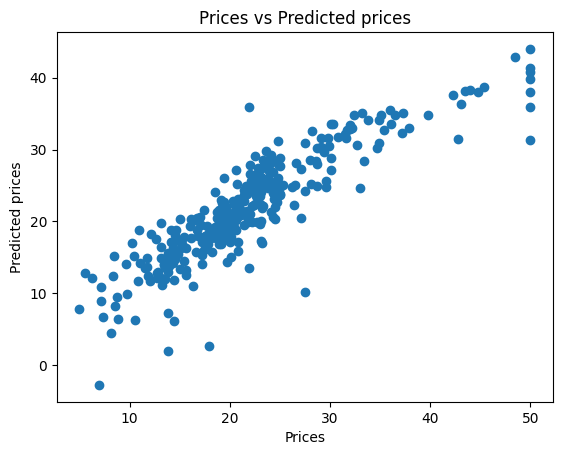

In [ ]:
#Visualizing the differences between actual prices and predicted prices
plt.scatter(y_train,y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

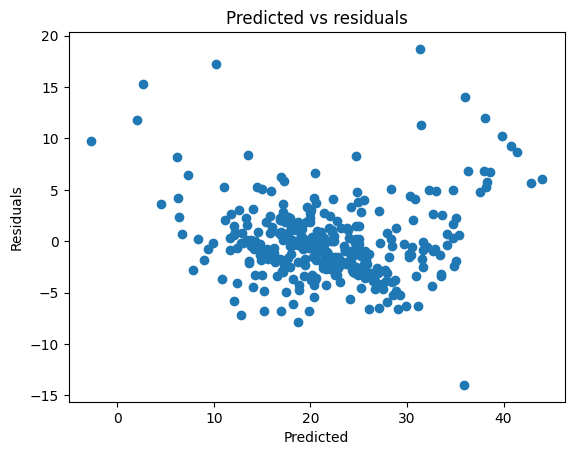

In [ ]:
#Checking residuals
plt.scatter(y_pred, y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [ ]:
#For test data

#Predicting test data with the model
y_test_pred=lm.predict(X_test)

In [ ]:
#Model Evaluation
acc_linreg=metrics.r2_score(y_test,y_test_pred)
print('R^2:',acc_linreg)
print('Adjusted R^2:',1-(1-metrics.r2_score(y_test,y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:', metrics.mean_absolute_error(y_test,y_test_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

R^2: 0.7098924384360799
Adjusted R^2: 0.6518709261232958
MAE: 3.7959303485720586
MSE: 35.61906149644722
RMSE: 5.968170699338887
